In [1]:
#sales_train.csv


**Import the required packages**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warnings
warnings.filterwarnings('ignore')

**Read the dataset file**


In [3]:
sales_df=pd.read_csv("sales_train.csv")
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Data Preprocessing Part-1**


In [5]:
sales_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
sales_df.shape

(8523, 12)

In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
cat_var=sales_df.select_dtypes(include='object').columns.tolist() 
print(len(cat_var))
(cat_var)

7


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
sales_df.select_dtypes(include='object').nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [10]:
num_var=sales_df.select_dtypes(exclude='object').columns.tolist() 
print(len(num_var))
(num_var)

5


['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [11]:
sales_df.select_dtypes(exclude='object').nunique()

Item_Weight                   415
Item_Visibility              7880
Item_MRP                     5938
Outlet_Establishment_Year       9
Item_Outlet_Sales            3493
dtype: int64

**Dropping the Item_Identifier column**

In [12]:
# We are dropping this col has there are more labels
sales_df.drop(columns=['Item_Identifier'],inplace=True)
sales_df.shape

(8523, 11)

**Check for null values in each col**

In [13]:
sales_df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
# filtering  the null values columns
null_cols=[i for i in sales_df.columns if sales_df[i].isnull().sum()>0]
null_cols

['Item_Weight', 'Outlet_Size']

In [15]:
# if null_value column is of "categorical type" then fill null values with "mode"
# else null_value column is of "numerical type" then fill null values with "median" / "mean"

In [16]:
# categorical columns & numerical columns with null values
for i in null_cols:
    if i in cat_var: ## filling null values of categorical cols
        mode_value=sales_df[i].mode().iloc[0]
        sales_df[i].fillna(mode_value,inplace=True)
    else:
        median_value=sales_df[i].median() ## filling null values of numerical cols
        sales_df[i].fillna(median_value,inplace=True)

In [17]:
# After filling missing values checking if any null values are present

In [18]:
sales_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
sales_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis

**Categorical_cols_Bar_Plot**

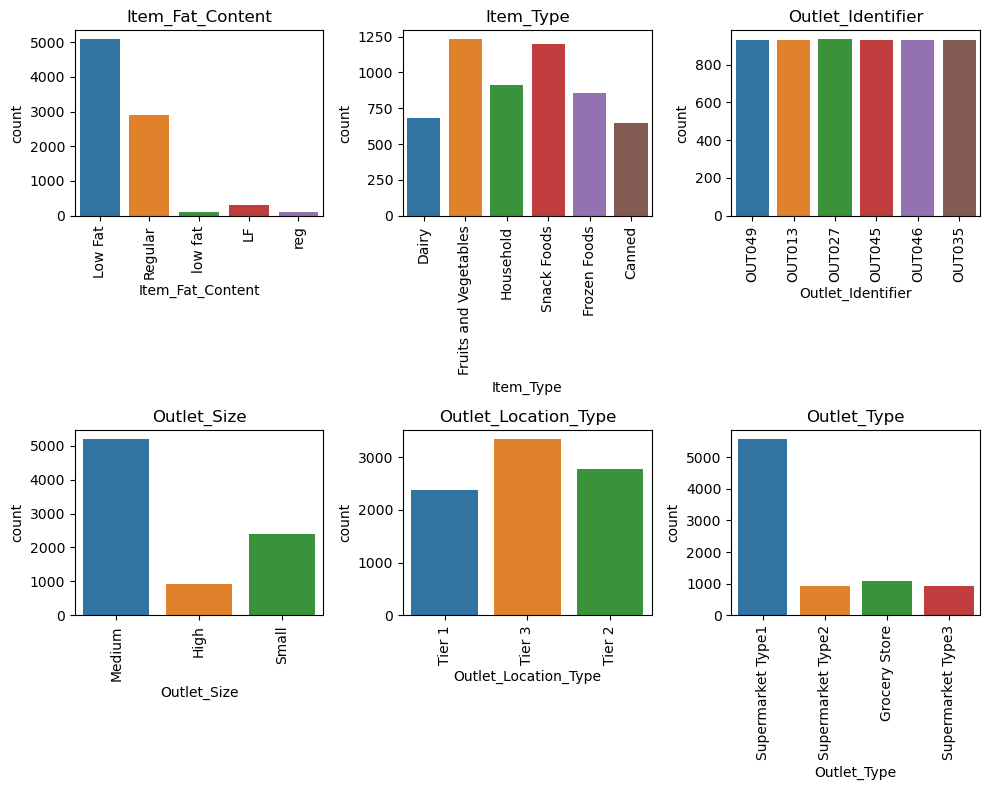

In [20]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_var = sales_df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_var)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 4*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_var):
    top_values = sales_df[var].value_counts().nlargest(6).index
    filtered_df = sales_df[sales_df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

**Categorical_cols_Pie_Chart**

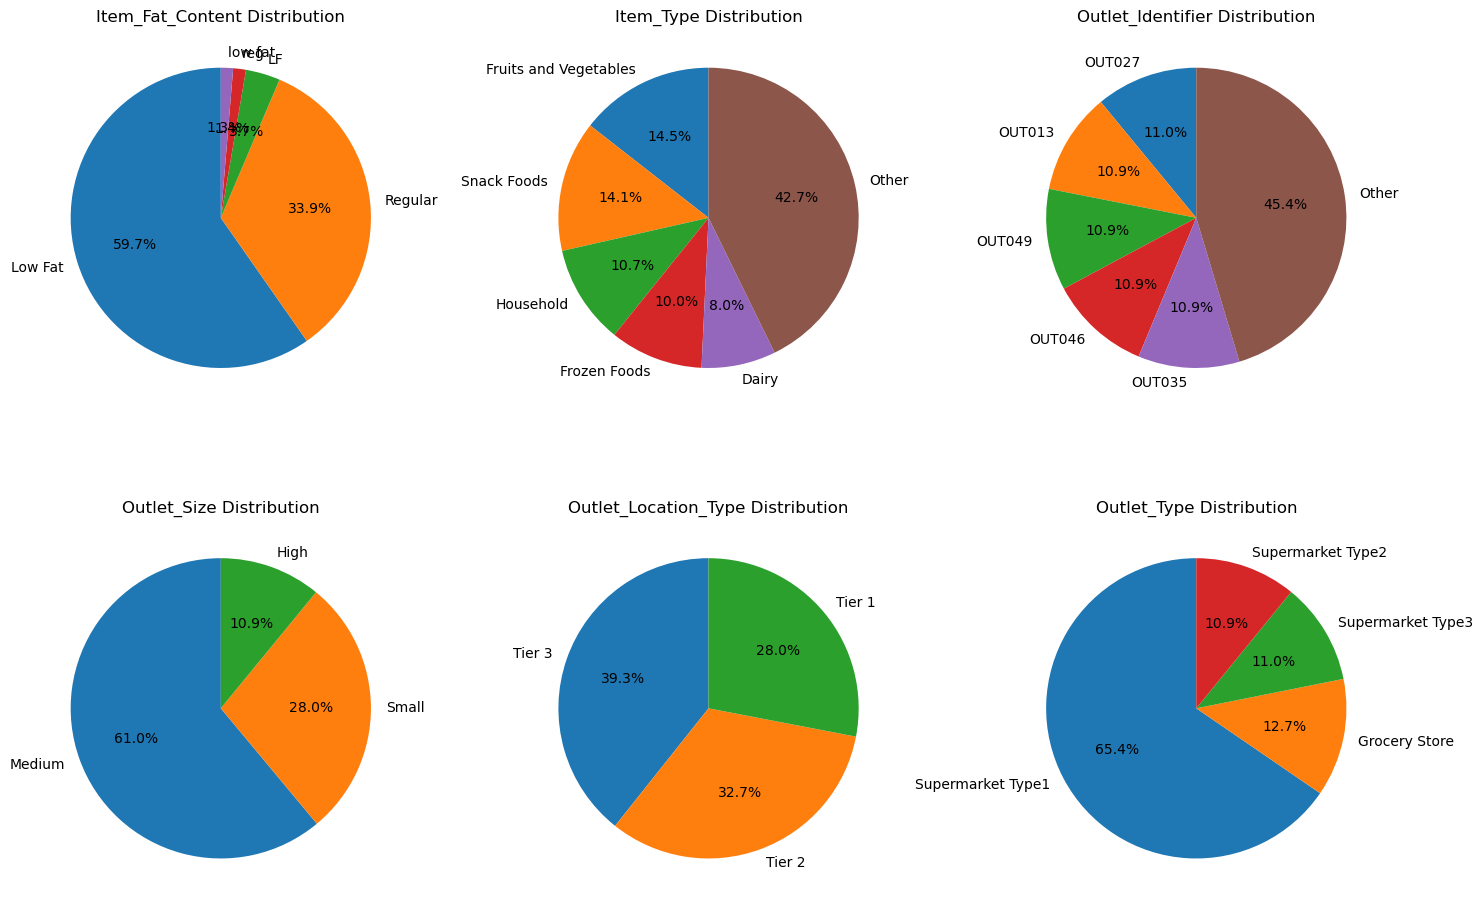

In [21]:
# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = [col for col in sales_df.columns if col != 'y' and sales_df[col].dtype == 'object']

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = sales_df[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%0.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

**Numerical_cols_Hist_Plot**


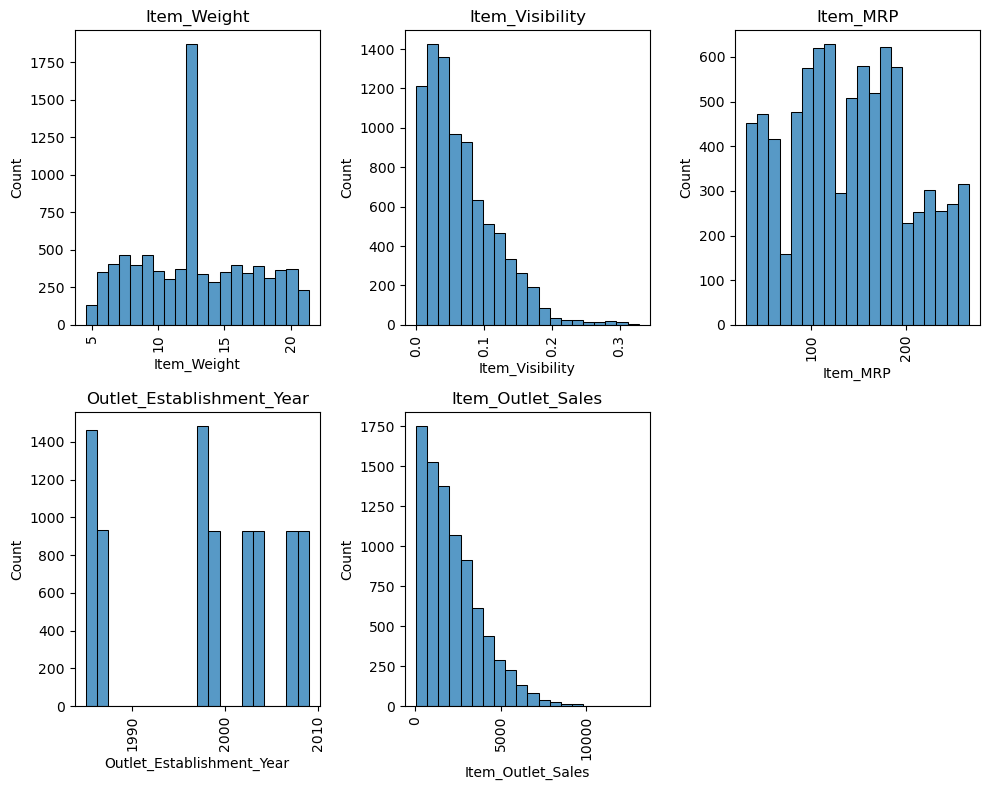

In [22]:
# Get the names of all columns with data type 'int'
#num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars = sales_df.select_dtypes(exclude='object').columns.tolist()


# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 4*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(num_vars):
    sns.histplot(x=sales_df[var], ax=axs[i],bins=20)
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

**Box_Plot**


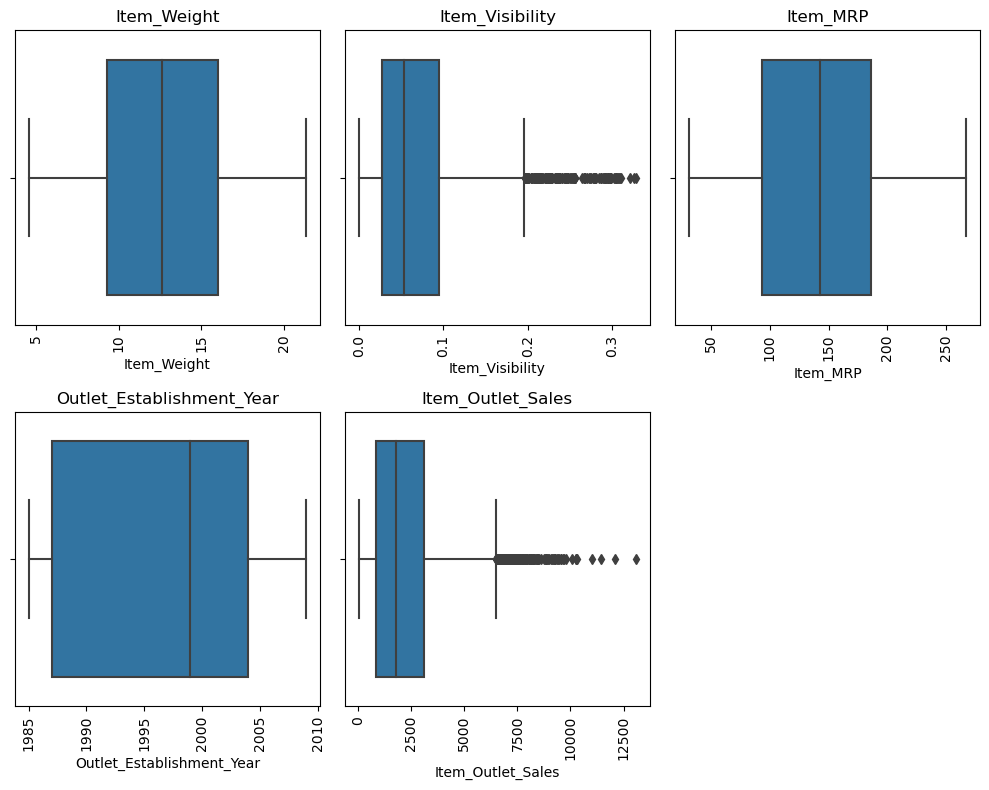

In [23]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = sales_df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 4*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=sales_df[var], ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

**Outliers_Detection**

In [24]:
num_list = sales_df.select_dtypes(include=['int', 'float']).columns.tolist()
for column_i in num_list:
    # calculating the q1,q2,q3,IQR,LB and UB values 
    data= sales_df[column_i]
    Q1=round(np.quantile(data,0.25),2)
    Q2=round(np.quantile(data,0.50),2)
    Q3=round(np.quantile(data,0.75),2)
    IQR=(Q3-Q1)
    LB=Q1-1.5*IQR
    UB=Q3+1.5*IQR
    ## condition to find outliers
    cond1=data<LB
    cond2=data>UB
    ## outlier for each dataframe
    outliers_data=sales_df[cond1|cond2]
    if(len(outliers_data)>0):
        print(f'Outliers are present within {column_i}')
        print()
        print("******************************************")
    else:
        print()
        print(f'No outliers are found in {column_i}')
        print("******************************************")
    


No outliers are found in Item_Weight
******************************************
Outliers are present within Item_Visibility

******************************************

No outliers are found in Item_MRP
******************************************

No outliers are found in Outlet_Establishment_Year
******************************************
Outliers are present within Item_Outlet_Sales

******************************************


**KDE_Plot**


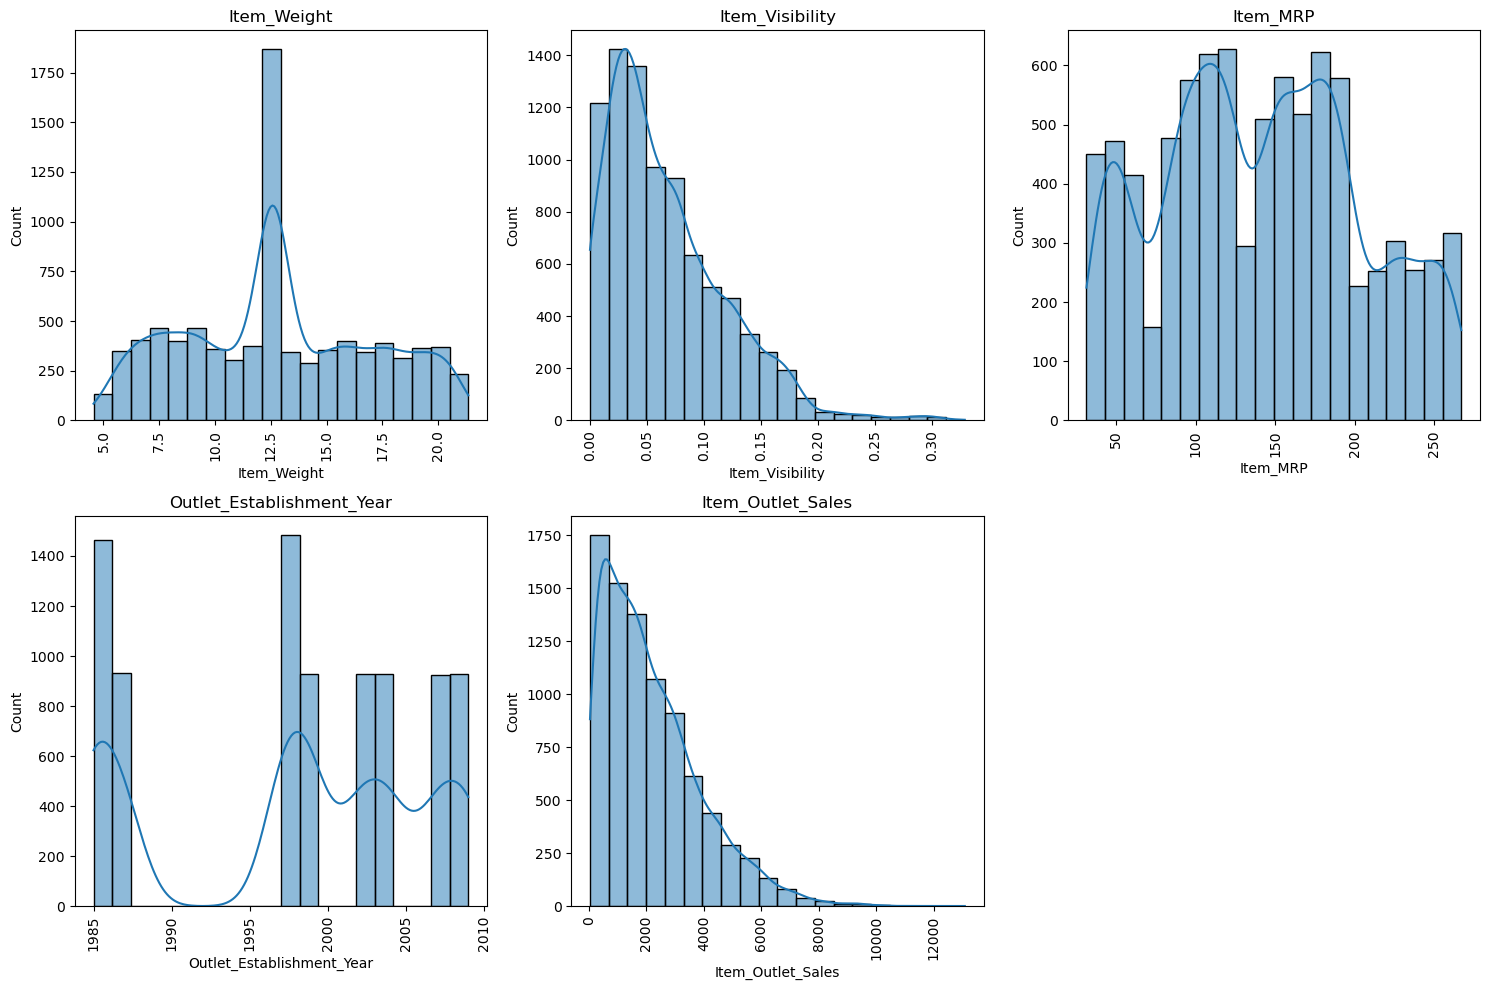

In [25]:
# Get the names of all columns with data type 'int'
num_vars = sales_df.select_dtypes(exclude=['object']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(num_vars):
    sns.histplot(data=sales_df, x=var, 
                  kde=True, ax=axs[i],bins=20)
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

**Converting The Categorical into Numerical Columns**

**> Label Encoding for object datatype**


In [26]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in sales_df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {sales_df[col].unique()}")

Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size: ['Medium' 'High' 'Small']
Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


**> Conversion from Categorical cols into numerical cols**


In [27]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in sales_df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(sales_df[col].unique())

    # Transform the column using the encoder
    sales_df[col] = label_encoder.transform(sales_df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {sales_df[col].unique()}")

Item_Fat_Content: [1 2 3 0 4]
Item_Type: [ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
Outlet_Identifier: [9 3 0 1 5 7 2 8 6 4]
Outlet_Size: [1 0 2]
Outlet_Location_Type: [0 2 1]
Outlet_Type: [1 2 0 3]


In [28]:
## All the categorical col labels are converted into numerical labels respectively

In [29]:
sales_df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017255,-0.014168,0.028038,0.024951,-0.007666,0.007739,-0.010536,0.001958,-0.009973,0.009693
Item_Fat_Content,-0.017255,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.014168,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028038,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024951,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.007666,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,0.007739,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.010536,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.001958,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.009973,-0.004214,-0.173468,0.003053,-0.001975,0.099873,-0.122304,-0.201483,0.467219,1.000000,0.401522


<Axes: >

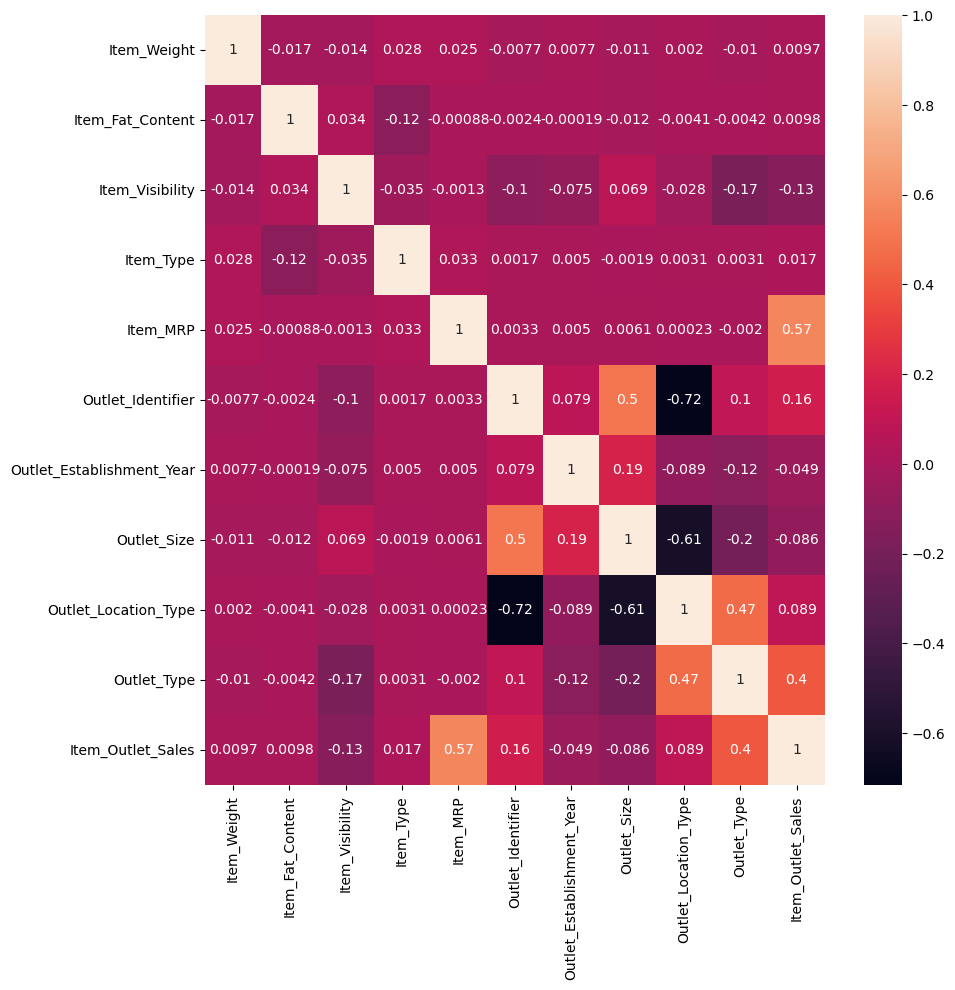

In [30]:
# Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(sales_df.corr(), fmt='.2g', annot=True)

In [31]:
sales_df.corr()['Item_Outlet_Sales']

Item_Weight                  0.009693
Item_Fat_Content             0.009800
Item_Visibility             -0.128625
Item_Type                    0.017048
Item_MRP                     0.567574
Outlet_Identifier            0.162325
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.086182
Outlet_Location_Type         0.089367
Outlet_Type                  0.401522
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

# Model Development

**STEP-1: Divide data into input(X) and output data(y)**


In [32]:
## here output col is Item_Outlet_Sales 
X=sales_df.drop('Item_Outlet_Sales',axis=1)
y=sales_df['Item_Outlet_Sales']

**STEP-2: Train Test Split**


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5966, 10)
(2557, 10)
(5966,)
(2557,)


**Remove Outlier from Train Data using Z-Score**

In [35]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Item_Visibility']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**STEP-3: Linear_Regression_Model Development**

In [36]:
from sklearn.linear_model import LinearRegression   #s1: import package
LR=LinearRegression()                               #s2: read and save the data
LR.fit(X_train,y_train)

LinearRegression()

**STEP-4: Model Predicitions**

In [37]:
## Model predictions  happens on X_test
y_predictions=LR.predict(X_test)
y_predictions

array([2477.29454752, 2473.1810916 , 1809.22120401, ..., 2317.56680268,
       2143.20124614, 2417.45298253])

In [38]:
y_test

4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
          ...    
5460    2996.1000
7384    2173.1712
1336    1981.4208
8455    4206.5244
5516    3238.4512
Name: Item_Outlet_Sales, Length: 2557, dtype: float64

In [39]:
y_actual_test=y_test.values
y_actual_test

array([1426.1436, 1201.769 , 1836.2764, ..., 1981.4208, 4206.5244,
       3238.4512])

**STEP-5: Model Evaluation**

In [40]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
R2=r2_score(y_test,y_predictions)
MSE=mean_squared_error(y_test,y_predictions)
RMSE=np.sqrt(MSE)
print("R-square:",R2)
print("MSE:",MSE)
print("RMSE:",RMSE)

R-square: 0.5090970531418777
MSE: 1494839.852722237
RMSE: 1222.6364352178603


**STEP-6: Values Analysis**

In [41]:
from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              2614.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):                        0.00
Time:                        22:09:11   Log-Likelihood:                         -50086.
No. Observations:                5895   AIC:                                  1.002e+05
Df Residuals:                    5885   BIC:                                  1.003e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Weight                  -2.0874      3.627     -0.575      0.565      -9.198       5.023
Item_Fat_Content             26.4505     23.933      1.105      0.269     -20.467      73.368
Item_Visibility           -1071.0296    330.541     -3.240      0.001   -1719.011    -423.048
Item_Type                     2.6218      3.730      0.703      0.482      -4.691       9.934
Item_MRP                     15.5307      0.248     62.749      0.000      15.045      16.016
Outlet_Identifier            58.1923     11.066      5.259      0.000      36.499      79.886
Outlet_Establishment_Year    -0.3112      0.059     -5.245      0.000      -0.428      -0.195
Outlet_Size                -339.3176     33.208    -10.218      0.000    -404.417    -274.219
Outlet_Location_Type       -231.4404     46.009     -5.030      0.000    -321.634    -141.247
Outlet_Type                 861.7338     31.313     27.520      0.000     800.348     923.119
==============================================================================
Omnibus:                      684.639   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1567.459
Skew:                           0.695   Prob(JB):                         0.00
Kurtosis:                       5.109   Cond. No.                     4.29e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**STEP-7: Save the Model**

In [42]:
##dowm steps:
##Model name=LR
##In which name the model is been saved : Big_mart_model
## Extension is:Pickle(model_name.pkl) Path-has to be given
## mode of operation: write:wb(write in bytes)
import pickle
pickle.dump(LR,
            open('Big_mart_model.pkl','wb'))

**STEP-8: Load the Model**

In [43]:
model=pickle.load(open('Big_mart_model.pkl','rb'))
model

LinearRegression()

**STEP-9: Predictions**


In [44]:
X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4931,14.500,1,0.089960,8,159.5604,7,2002,1,1,1
4148,12.600,1,0.009535,13,64.5510,5,1985,1,2,3
7423,11.500,1,0.017742,8,129.6626,2,2007,1,1,1
4836,10.195,1,0.000000,5,143.1154,2,2007,1,1,1
944,21.000,1,0.049264,13,195.0478,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...
5460,12.600,0,0.048980,6,148.7050,5,1985,1,2,3
7384,13.500,1,0.021584,6,179.5976,3,2009,1,2,2
1336,20.700,2,0.100583,6,123.5388,3,2009,1,2,2
8455,18.000,1,0.073607,3,156.6972,2,2007,1,1,1


In [45]:
X_test.values

array([[1.45000000e+01, 1.00000000e+00, 8.99602600e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.26000000e+01, 1.00000000e+00, 9.53475800e-03, ...,
        1.00000000e+00, 2.00000000e+00, 3.00000000e+00],
       [1.15000000e+01, 1.00000000e+00, 1.77420200e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [2.07000000e+01, 2.00000000e+00, 1.00583009e-01, ...,
        1.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       [1.80000000e+01, 1.00000000e+00, 7.36068290e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.60000000e+00, 2.00000000e+00, 1.42292265e-01, ...,
        0.00000000e+00, 2.00000000e+00, 1.00000000e+00]])

In [46]:
X_test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [47]:
len(X_test.columns)

10

In [48]:
model.predict([[1,2,3,4,5,6,7,8,9,10]])
# the input columns are 11
# so we need pass 11 values as list

array([-590.3187342])

In [49]:
model.predict(X_test)

array([2477.29454752, 2473.1810916 , 1809.22120401, ..., 2317.56680268,
       2143.20124614, 2417.45298253])